In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
e2_set1 = pd.read_csv("C:\KHANJAN\Spring Sophie\DS 203\E2-set1.csv")
e2_set2= pd.read_csv("C:\KHANJAN\Spring Sophie\DS 203\E2-set2.csv") 
e2_set3= pd.read_csv("C:\KHANJAN\Spring Sophie\DS 203\E2-set3.csv")
datasets = [e2_set1,e2_set2,e2_set3]

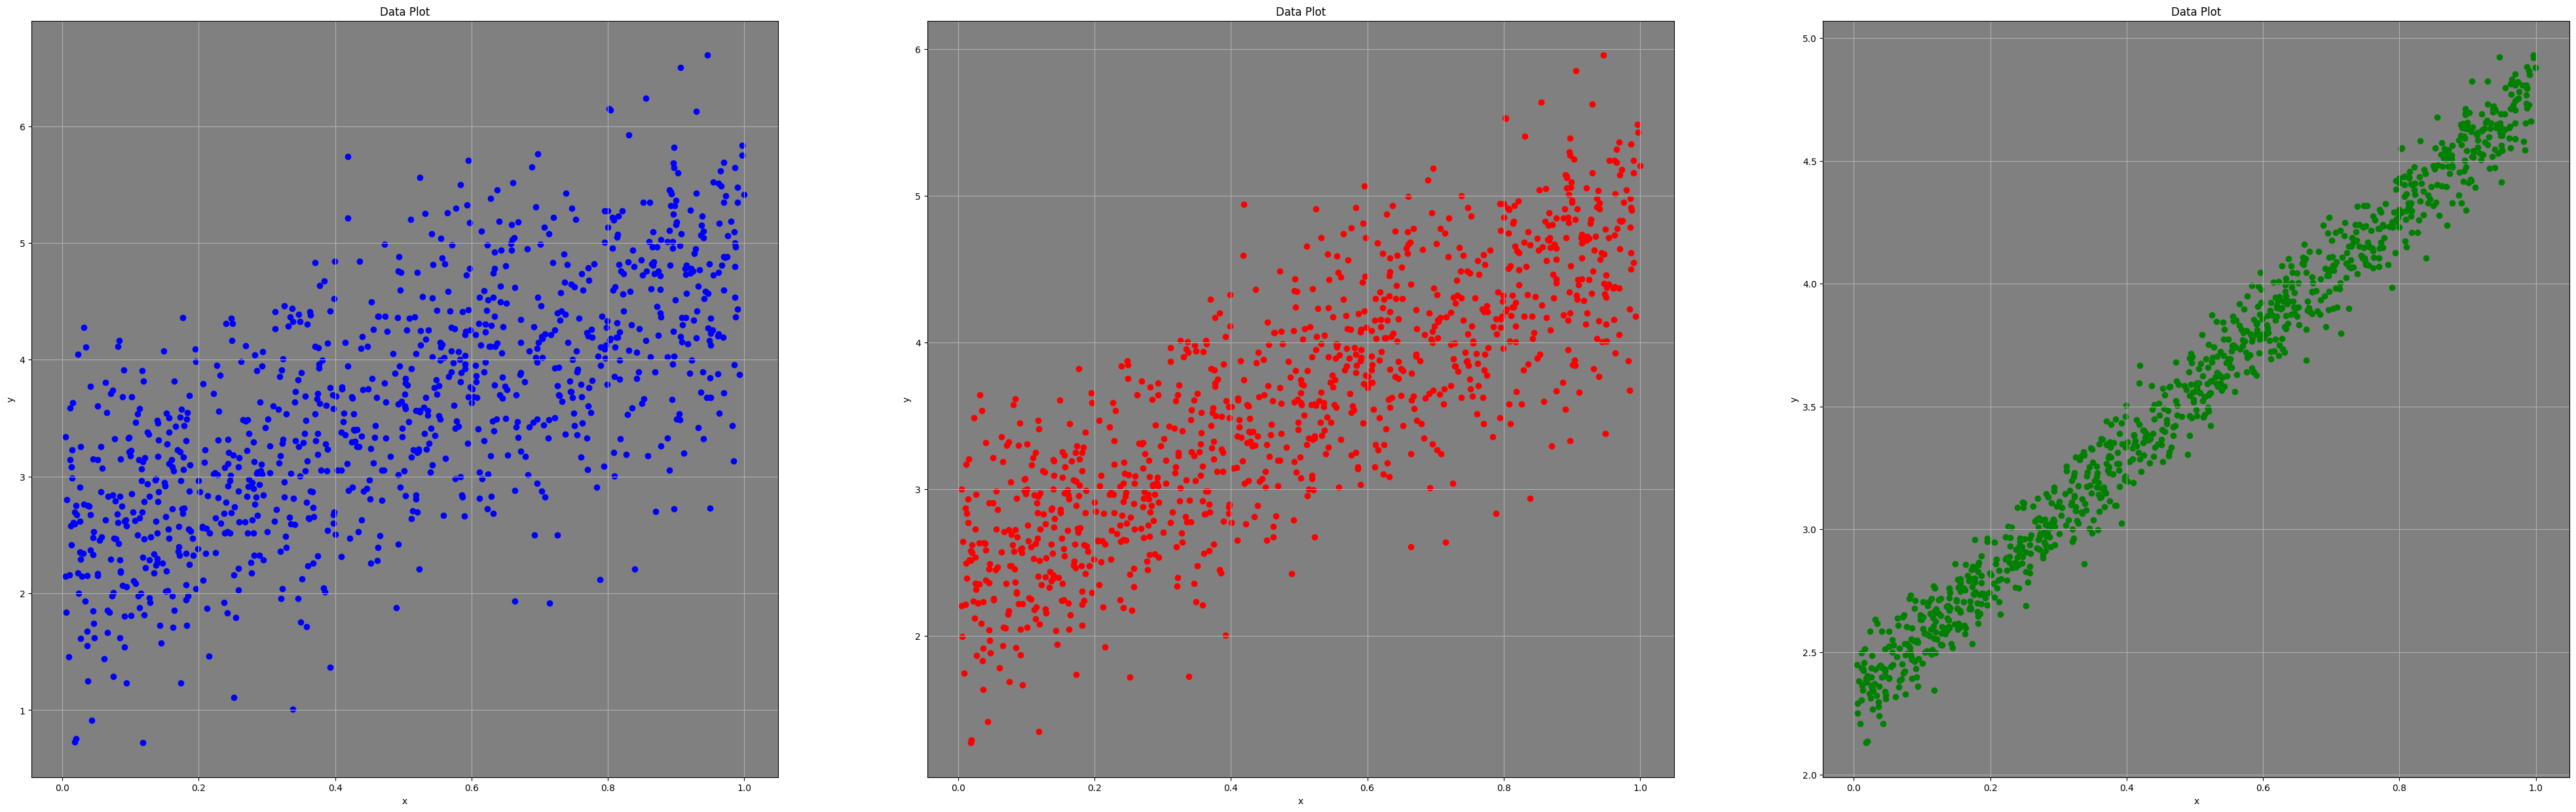

In [3]:
fig,ax = plt.subplots(1,3,figsize=(50,15))
ax[0].set_facecolor('gray')
ax[0].scatter(e2_set1['x'],e2_set1['y'],c='b',marker = 'o')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Data Plot')
ax[0].grid(visible=True)
ax[1].set_facecolor('gray')
ax[1].scatter(e2_set2['x'],e2_set2['y'],c='r',marker = 'o')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('Data Plot')
ax[1].grid(visible=True)
ax[2].set_facecolor('gray')
ax[2].scatter(e2_set3['x'],e2_set3['y'],c='g',marker = 'o')
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')
ax[2].set_title('Data Plot')
ax[2].grid(visible=True)
plt.show()

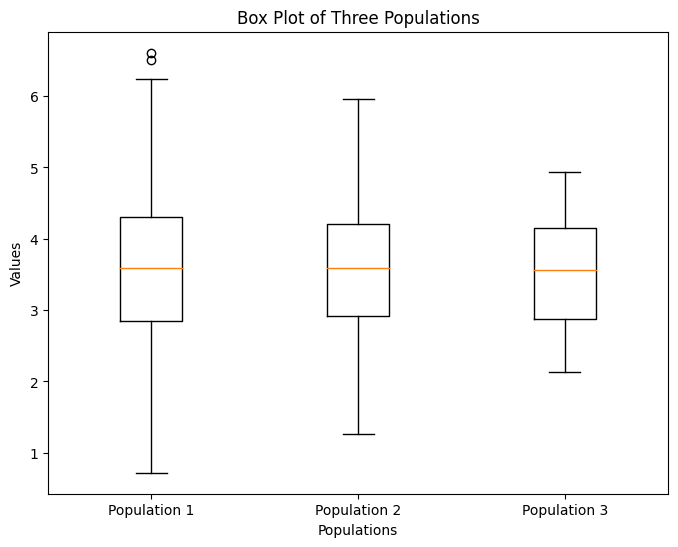

In [4]:
plt.figure(figsize=(8, 6))
plt.boxplot([e2_set1['y'],e2_set2['y'],e2_set3['y']], labels=['Population 1', 'Population 2', 'Population 3'])
plt.title('Box Plot of Three Populations')
plt.xlabel('Populations')
plt.ylabel('Values')
plt.show()

Let's apply Linear regression to all the models and see the fit and error of the dataset

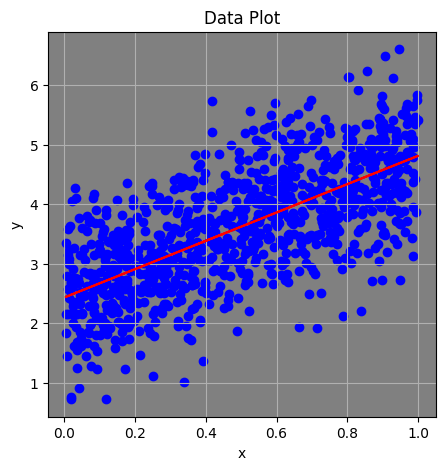

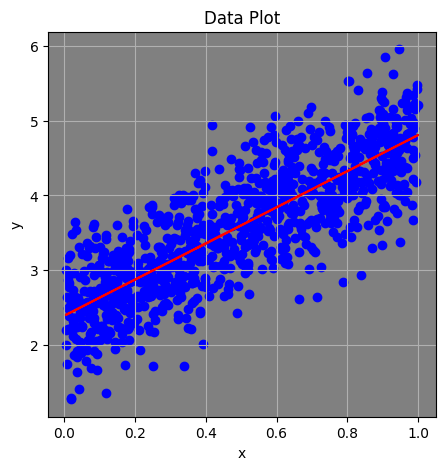

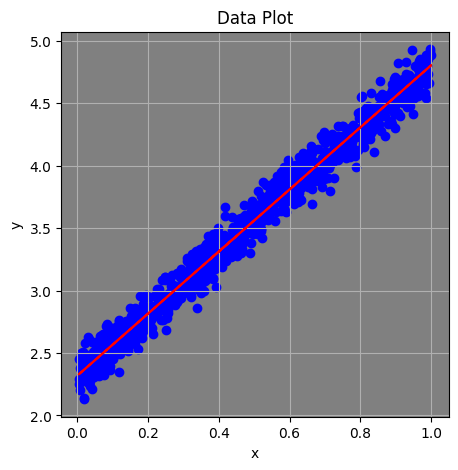

In [5]:
errors = []
for dataset in datasets :
    X = dataset['x'].values.reshape(-1, 1)
    y = dataset['y'].values.reshape(-1, 1)
    
    model_1 = LinearRegression()
    model_1.fit(X,y)
    y_pred = model_1.predict(X)
    errors.append(y-y_pred)
    fig,ax = plt.subplots(figsize=(5,5))
    ax.set_facecolor('gray')
    ax.scatter(dataset['x'],dataset['y'],c='b',marker = 'o')
    ax.plot(dataset['x'],y_pred.flatten(),c='r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Data Plot')
    ax.grid(visible=True)

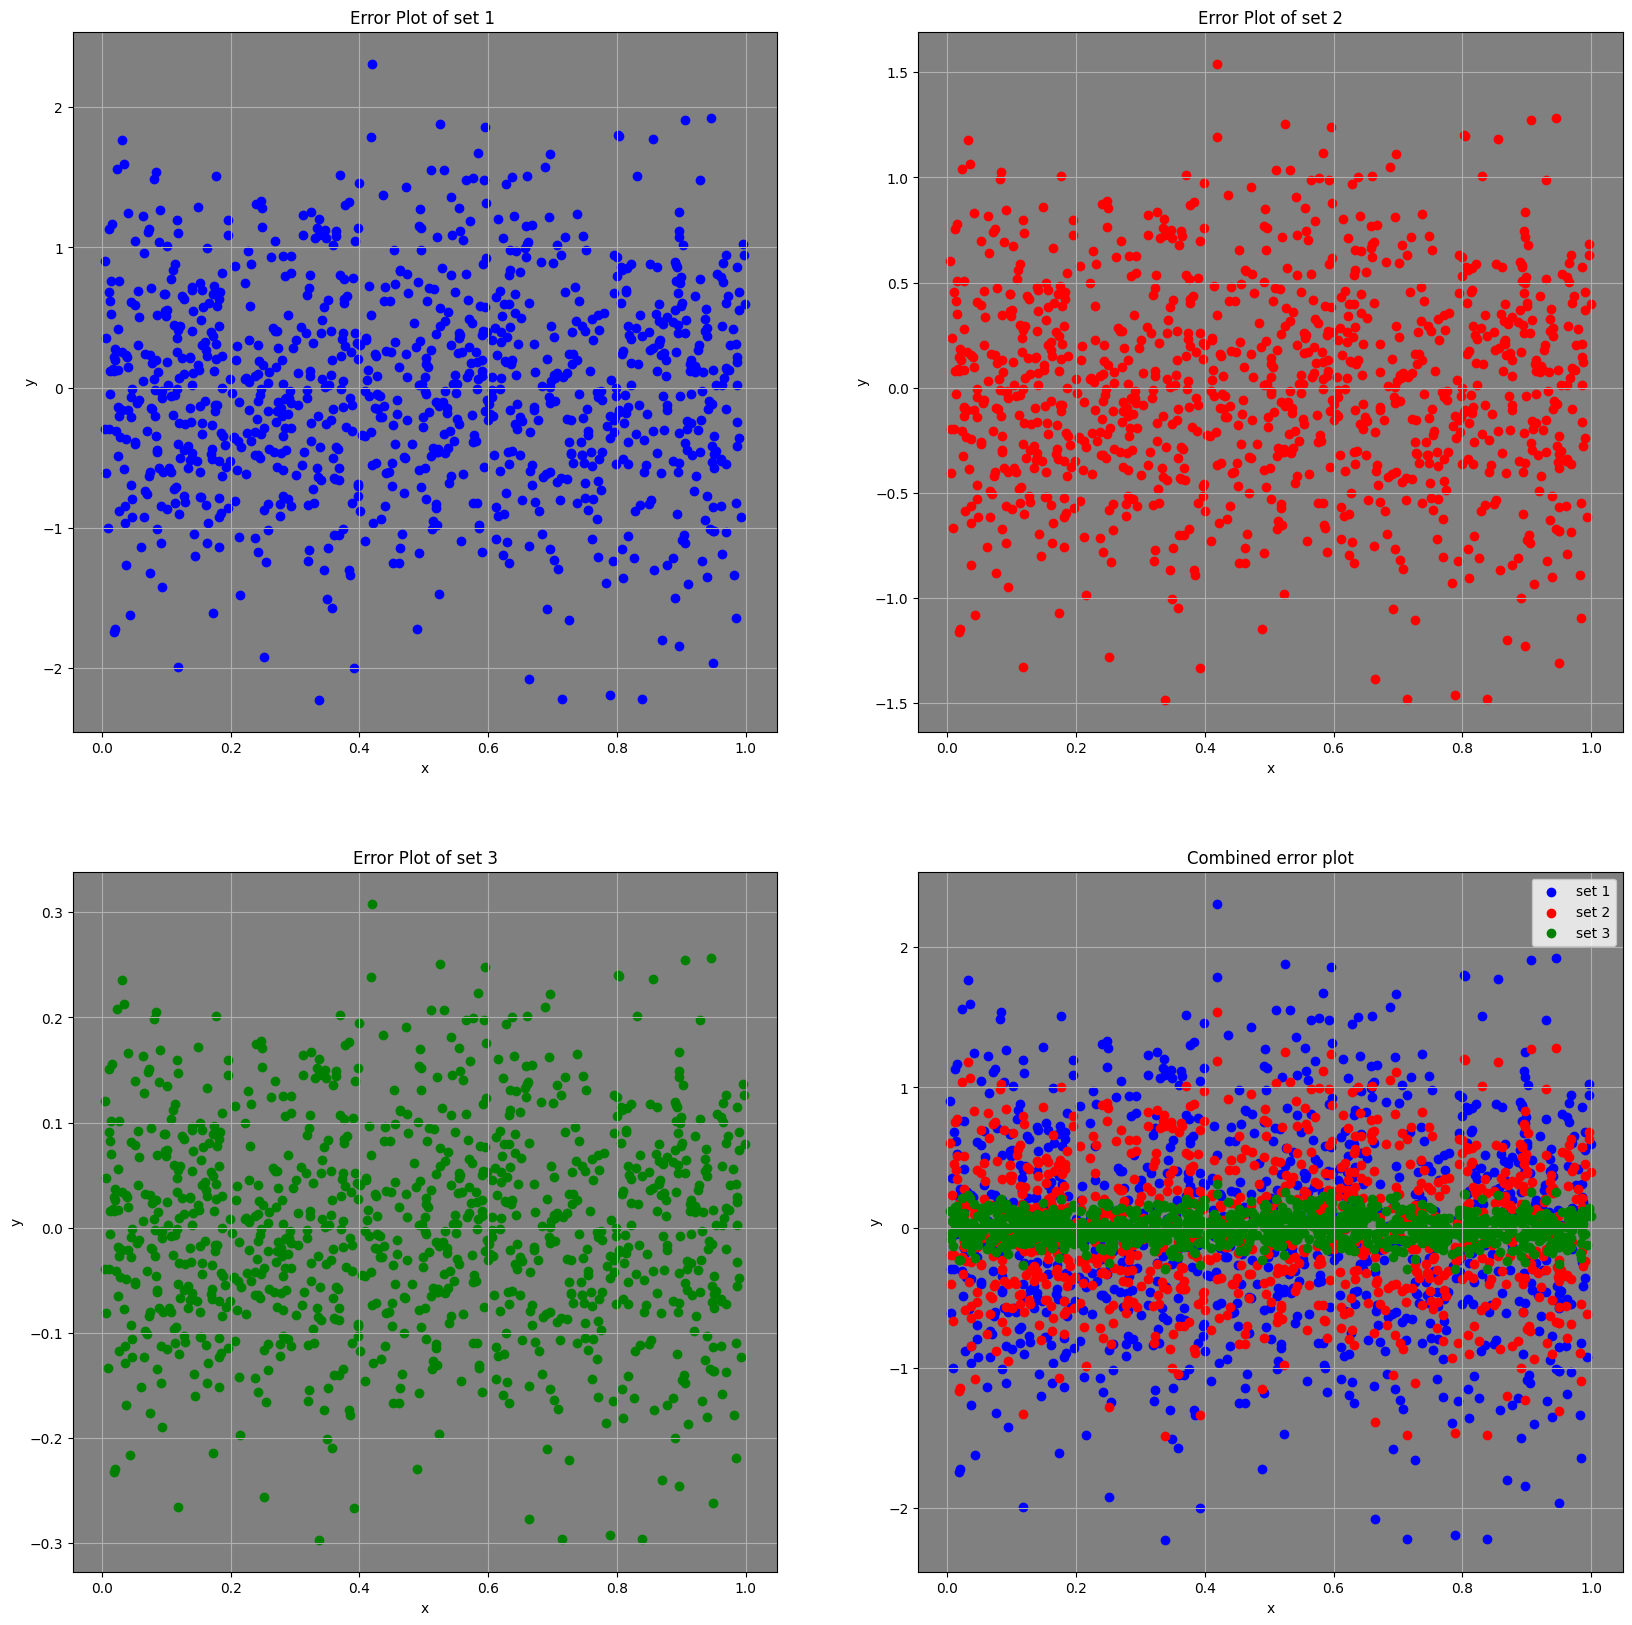

In [6]:
fig, ax= plt.subplots(2,2,figsize=(20,20))
ax[0,0].set_facecolor('gray')
ax[0,0].scatter(e2_set1['x'],errors[0],c='b',marker = 'o')
ax[0,0].set_xlabel('x')
ax[0,0].set_ylabel('y')
ax[0,0].set_title('Error Plot of set 1 ')
ax[0,0].grid(visible=True)
ax[0,1].set_facecolor('gray')
ax[0,1].scatter(e2_set2['x'],errors[1],c='r',marker = 'o')
ax[0,1].set_xlabel('x')
ax[0,1].set_ylabel('y')
ax[0,1].set_title('Error Plot of set 2')
ax[0,1].grid(visible=True)
ax[1,0].set_facecolor('gray')
ax[1,0].scatter(e2_set3['x'],errors[2],c='g',marker = 'o')
ax[1,0].set_xlabel('x')
ax[1,0].set_ylabel('y')
ax[1,0].set_title('Error Plot of set 3')
ax[1,0].grid(visible=True)
ax[1,1].scatter(e2_set1['x'], errors[0], c='b', marker='o', label='set 1')
ax[1,1].scatter(e2_set2['x'], errors[1], c='r', marker='o', label='set 2')
ax[1,1].scatter(e2_set3['x'], errors[2], c='g', marker='o', label='set 3')
ax[1,1].set_facecolor('grey')
ax[1,1].set_xlabel('x')
ax[1,1].set_ylabel('y')
ax[1,1].legend()
ax[1,1].set_title('Combined error plot')
ax[1,1].grid(visible=True)


In [7]:
means = [e2_set1.mean(),e2_set2.mean(),e2_set3.mean()]
for i in range(3): print(f'{means[i]}') 
print("-------------------------------")
variance = [e2_set1.var(),e2_set2.var(),e2_set3.var()]
for i in range(3): print(f'{variance[i]}') 

y    3.599813
x    0.490257
dtype: float64
y    3.575089
x    0.490257
dtype: float64
y    3.535531
x    0.490257
dtype: float64
-------------------------------
y    1.033982
x    0.085344
dtype: float64
y    0.744874
x    0.085344
dtype: float64
y    0.536576
x    0.085344
dtype: float64


## Part B

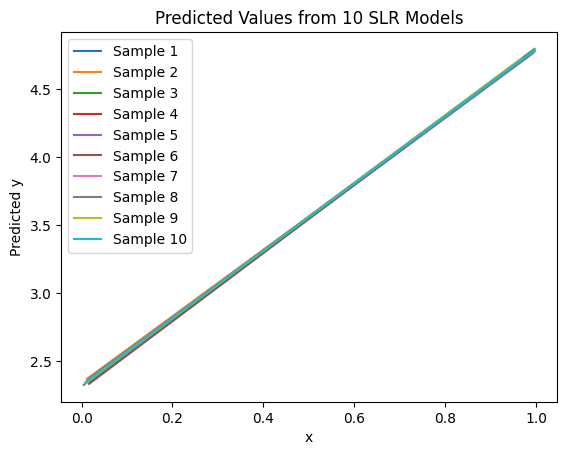

In [97]:
# Set the seed for reproducibility. What is this? Why is it necessary?
np.random.seed(42)

# Create a DataFrame to store the results
columns = ['Sample', 'MSE', 'R2', 'Coeff_0', 'pvalue_0', 'Coeff_0_CI_Low','Coeff_0_CI_High', 'Coeff_1', 'pvalue_1', 'Coeff_1_CI_Low','Coeff_1_CI_High','F-Statistic','F-pvalue']
results_df = pd.DataFrame(columns=columns)

# Create a subplot for the plot
fig, ax = plt.subplots()

# Create random samples of the specified sample size and fit SLR models and calculate the metrics
sample_size = 100

# Create a list for storing all the models
LRModels = []

for i in range(10):
    # Create a random sample
    random_sample = e2_set3.sample(n=sample_size, replace=False)

    # Extract dependent variable (y) and independent variable (x)
    y = random_sample['y']
    x = random_sample['x']
    
    # Add a constant term to the independent variable (for intercept)
    # Why is this necessary?
    x = sm.add_constant(x)

    # Fit Simple Linear Regression model
    model = sm.OLS(y, x).fit()
    LRModels.append(model)

    # Calculate metrics
    mse = np.mean(model.resid**2)
    r2 = model.rsquared
    
    CI_interval = model.conf_int(alpha=0.05)

    # Append results to the DataFrame
    results_df = pd.concat([results_df, pd.DataFrame({
        'Sample': [i + 1],
        'MSE': [mse],
        'R2': [r2],
        'Coeff_0': [model.params[0]],
        'pvalue_0': [model.pvalues[0]],
        'Coeff_1': [model.params[1]],
        'pvalue_1': [model.pvalues[1]],
        'Coeff_0_CI_Low': [CI_interval[0][0]],
        'Coeff_0_CI_High': [CI_interval[0][1]],
        'Coeff_1_CI_Low': [CI_interval[1][0]],
        'Coeff_1_CI_High': [CI_interval[1][1]],
        'F-Statistic': [model.fvalue],
        'F-pvalue': [model.f_pvalue]
    })], axis=0)

    # Plot the predicted values
    x_pred = np.linspace(x.min(), x.max(), 100)
    x_pred = sm.add_constant(x_pred)
    y_pred = model.predict(x_pred)
    ax.plot(x_pred[:, 1], y_pred, label=f'Sample {i + 1}')

# Set labels and title for the plot
#ax.scatter(df['x'], df['y'],marker=".")
ax.set_xlabel('x')
ax.set_ylabel('Predicted y')
ax.set_title('Predicted Values from 10 SLR Models')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

In [98]:
# Print the results table
results_df[['Sample', 'MSE', 'R2', 'Coeff_0', 'pvalue_0', 'Coeff_1', 'pvalue_1','F-Statistic','F-pvalue']]
#results_df.to_csv(f"E2-set2-out-sample_size-{sample_size}.csv",index=False)

,Sample,MSE,R2,Coeff_0,pvalue_0,Coeff_1,pvalue_1,F-Statistic,F-pvalue
0,1,0.008811,0.983133,2.299848,3.350789e-110,2.499917,1.079421e-88,5712.298884,1.079421e-88
0,2,0.010336,0.981829,2.339603,3.233229e-109,2.449827,4.150632e-87,5295.353199,4.150632e-87
0,3,0.011277,0.977619,2.320036,2.299796e-106,2.485384,1.132187e-82,4280.757642,1.132187e-82
0,4,0.009101,0.983579,2.320502,1.744921e-109,2.472583,2.904441e-89,5870.040751,2.904441e-89
0,5,0.011648,0.979671,2.312655,7.671020e-103,2.468884,1.017467e-84,4722.643672,1.017467e-84
0,6,0.007984,0.984215,2.290545,4.967051e-110,2.510617,4.187665e-90,6110.605792,4.187665e-90
0,7,0.010042,0.978392,2.320239,8.761033e-106,2.477610,2.022092e-83,4437.395597,2.022092e-83
0,8,0.009400,0.983842,2.331260,3.017469e-108,2.456391,1.317929e-89,5967.046012,1.317929e-89
0,9,0.010674,0.982629,2.316288,1.214595e-109,2.490285,4.579112e-88,5543.475911,4.579112e-88
0,10,0.009406,0.980108,2.321598,1.474560e-106,2.476855,3.505205e-85,4828.609386,3.505205e-85


In [95]:
print(f"Lowest MSE : {results_df['MSE'].min():.3f} corresponding R2 and F-Stats is : {results_df[results_df['MSE'] == results_df['MSE'].min()]['R2'][0],results_df[results_df['MSE'] == results_df['MSE'].min()]['F-Statistic'][0]}")

Lowest MSE : 0.007 corresponding R2 and F-Stats is : (0.9872816505801024, 3726.0746393478435)


For sample size of 5 p-value of dataset is 0.012 and R2 is 0.906 F-stat is 29

For sample size of 10 p-value of dataset is 0.11 and R2 is 0.88416 F-stat is 61

For sample size of 20 p-value of dataset is 0.18 and R2 is 0.77 F-stat is 61.51 while variance of MSE is low than others

For sample size of 50 p-value of dataset is 0.11 and R2 is 0.598 F-stat is 71

For sample size of 10 p-value of dataset is 0.45 and R2 is 0.54 F-stat is 114.68

I will use correlation and error to estimate the quality of the dataset

In [96]:
mean_across_sample = results_df[['MSE','R2','F-Statistic','Coeff_0','Coeff_1']].mean()
mean_across_sample

MSE               0.009782
R2                0.982121
F-Statistic    2702.977766
Coeff_0           2.309944
Coeff_1           2.499398
dtype: float64

5 : 0.61

10 : 0.53

20 : 0.48

50 : 0.49

100: 0.49